In [59]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [160]:
#file_path = '/content/gdrive/My Drive/Colab Notebooks/train_df.csv'
data = pd.read_csv(file_path)
data.dropna(inplace = True)

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

Scaler = StandardScaler().fit(X_train)
X_train = Scaler.transform(X_train)
X_test = Scaler.transform(X_test)

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(559, 33)

(559,)

(140, 33)

(140,)

In [162]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [163]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

FFNN = keras.Sequential([
    layers.Dense(units = 64, activation="relu"),
    layers.Dropout(rate = 0.50), 
    layers.Dense(units = 128, activation="relu"),
    layers.Dropout(rate = 0.50), 
    layers.Dense(units = 256, activation="relu"),
    layers.Dropout(rate = 0.50),
    layers.Dense(units = 512, activation="relu"),
    layers.Dropout(rate = 0.30),
    layers.Dense(units = 2, activation="sigmoid")
    ])

In [164]:
FFNN.compile(
    optimizer = "adam",   # with default learning_rate=0.001, simply optimizer="rmsprop"         
               loss= "binary_crossentropy",                                 # same as loss= keras.losses.BinaryCrossentropy() 
               metrics=["accuracy"])    

In [165]:
FFNN.fit(X_train,y_train_cat,epochs=10,batch_size=64,validation_split= 0.2,shuffle = True)  

Epoch 1/10
7/7 [==============================] - 2s 126ms/step - loss: 0.6509 - accuracy: 0.6801 - val_loss: 0.5243 - val_accuracy: 0.7768
Epoch 2/10
7/7 [==============================] - 0s 15ms/step - loss: 0.6315 - accuracy: 0.7248 - val_loss: 0.5849 - val_accuracy: 0.7768
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6006 - accuracy: 0.7226 - val_loss: 0.5925 - val_accuracy: 0.7768
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 0.5933 - accuracy: 0.7248 - val_loss: 0.5550 - val_accuracy: 0.7768
Epoch 5/10
7/7 [==============================] - 0s 16ms/step - loss: 0.5709 - accuracy: 0.7248 - val_loss: 0.5477 - val_accuracy: 0.7768
Epoch 6/10
7/7 [==============================] - 0s 16ms/step - loss: 0.5862 - accuracy: 0.7248 - val_loss: 0.5647 - val_accuracy: 0.7768
Epoch 7/10
7/7 [==============================] - 0s 18ms/step - loss: 0.5741 - accuracy: 0.7248 - val_loss: 0.5573 - val_accuracy: 0.7768
Epoch 8/10
7/7 [==========

In [166]:
FFNN.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_129 (Dense)           (None, 64)                2176      
                                                                 
 dropout_104 (Dropout)       (None, 64)                0         
                                                                 
 dense_130 (Dense)           (None, 128)               8320      
                                                                 
 dropout_105 (Dropout)       (None, 128)               0         
                                                                 
 dense_131 (Dense)           (None, 256)               33024     
                                                                 
 dropout_106 (Dropout)       (None, 256)               0         
                                                                 
 dense_132 (Dense)           (None, 512)             

In [167]:
loss, accuracy = FFNN.evaluate(X_test, y_test_cat)

5/5 [==============================] - 0s 5ms/step - loss: 0.5321 - accuracy: 0.7643


In [168]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout

cnn = tf.keras.Sequential([
  tf.keras.layers.Reshape((-1, 1)),
  tf.keras.layers.Conv1D(128, kernel_size=5, activation='relu'),
  tf.keras.layers.MaxPooling1D(pool_size=1),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv1D(256, kernel_size=5, activation='relu'),
  tf.keras.layers.MaxPooling1D(pool_size=1),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')])

In [169]:
cnn.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
cnn.fit(X_train,y_train_cat,epochs=10,batch_size=512)

Epoch 1/10
2/2 [==============================] - 3s 99ms/step - loss: 0.7543 - accuracy: 0.4687
Epoch 2/10
2/2 [==============================] - 1s 92ms/step - loss: 0.6105 - accuracy: 0.7352
Epoch 3/10
2/2 [==============================] - 1s 88ms/step - loss: 0.6168 - accuracy: 0.7352
Epoch 4/10
2/2 [==============================] - 1s 97ms/step - loss: 0.6415 - accuracy: 0.7352
Epoch 5/10
2/2 [==============================] - 1s 96ms/step - loss: 0.6392 - accuracy: 0.7352
Epoch 6/10
2/2 [==============================] - 1s 90ms/step - loss: 0.6229 - accuracy: 0.7352
Epoch 7/10
2/2 [==============================] - 1s 103ms/step - loss: 0.5950 - accuracy: 0.7352
Epoch 8/10
2/2 [==============================] - 1s 99ms/step - loss: 0.5658 - accuracy: 0.7352
Epoch 9/10
2/2 [==============================] - 1s 100ms/step - loss: 0.5503 - accuracy: 0.7352
Epoch 10/10
2/2 [==============================] - 1s 98ms/step - loss: 0.5544 - accuracy: 0.7352


In [170]:
loss, accuracy = cnn.evaluate(X_test, y_test_cat)

5/5 [==============================] - 0s 15ms/step - loss: 0.4942 - accuracy: 0.7643


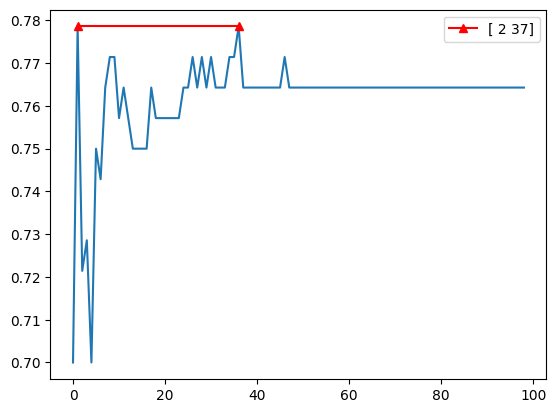

In [171]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
accuracy = []
for n_neighbors in range(1,100):
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))
df = pd.DataFrame({'n' : range(1,100),'accuracy': accuracy})
plt.plot(df.accuracy)
plt.plot(df[df.accuracy == df.accuracy.max()]['accuracy'],color = 'r',marker='^',label = df[df.accuracy == df.accuracy.max()]['n'].values)
plt.legend(loc = 'best')

In [172]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.7 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11954 sha256=a85074c09e107d704297c3071d1b37adeab3db50a64a5f809e104278653ab7c9
  Stored in directory: /root/.cache/pip/wheels/48/8c/93/3afb1916772591fe6bcc25cdf8b1c5bdc362f0ec8e2f0fd413
Successfully built stopit


In [174]:
#TPOT for KNN & SVC
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, 
                      #config_dict=config, 
                      random_state=42, verbosity=2)

# fit TPOT on dataset
tpot.fit(X_train, y_train)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7907657657657657

Generation 2 - Current best internal CV score: 0.7907657657657657

Generation 3 - Current best internal CV score: 0.7907979407979407

Generation 4 - Current best internal CV score: 0.7907979407979407

Generation 5 - Current best internal CV score: 0.792583655083655

Best pipeline: ExtraTreesClassifier(OneHotEncoder(input_matrix, minimum_fraction=0.1, sparse=False, threshold=10), bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=19, min_samples_split=5, n_estimators=100)


TPOTClassifier(generations=5, population_size=50, random_state=42, verbosity=2)

In [175]:
tpot.fitted_pipeline_

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(minimum_fraction=0.1, sparse=False)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.8, min_samples_leaf=19,
                                      min_samples_split=5, random_state=42))])

In [177]:
y_pred = tpot.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

accuracy: 0.8142857142857143


In [179]:
tpot.export ('/content/gdrive/My Drive/Colab Notebooks/tpot_best_pipeline.py')

In [181]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from tpot.builtins import OneHotEncoder
from tpot.export_utils import set_param_recursive


exported_pipeline = make_pipeline(
    OneHotEncoder(minimum_fraction=0.1, sparse=False, threshold=10),
    ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.8, min_samples_leaf=19, min_samples_split=5, n_estimators=100)
)

set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, results)
print(f"accuracy: {accuracy}")

accuracy: 0.8142857142857143
